In [1]:
# Importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

## Research Question 1: Is there a significant difference in house prices across different zip codes in the dataset?

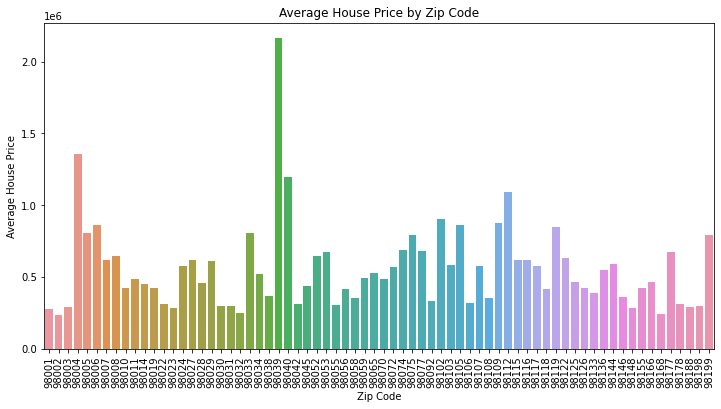

In [2]:

dt = pd.read_csv("kc_house_data.csv")

# Group the data by zip code and calculate the average house price
avg_price_by_zip = dt.groupby("zipcode")["price"].mean()

# Plot the average house price by zip code
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_zip.index, y=avg_price_by_zip.values)
plt.xlabel("Zip Code")
plt.ylabel("Average House Price")
plt.title("Average House Price by Zip Code")
plt.xticks(rotation=90)
plt.show()

## Research Question 2: Can we predict the house price based on features such as number of bedrooms, bathrooms, and living area using a multiple linear regression model?

In [3]:

# Select the features and target variable
X = dt[["bedrooms", "bathrooms", "sqft_living"]]
y = dt["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the house prices on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 272465.8418099099


## Research Question 3: Are there any outliers in the house price distribution, and if so, how do they impact the overall analysis?

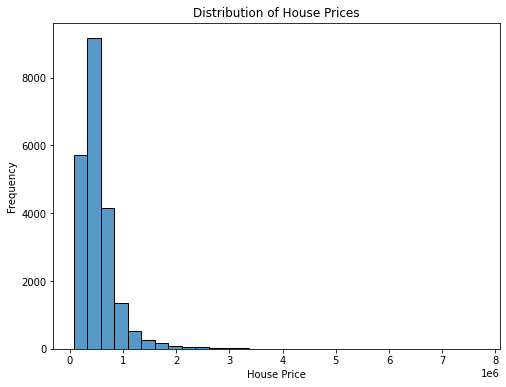

Number of Outliers: 1146


In [4]:

# Load the dataset into a DataFrame
dt = pd.read_csv("kc_house_data.csv")

# Plot the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(data=dt, x="price", bins=30)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

# Detect outliers using the interquartile range (IQR) method
Q1 = dt["price"].quantile(0.25)
Q3 = dt["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = dt[(dt["price"] < lower_bound) | (dt["price"] > upper_bound)]
print("Number of Outliers:", len(outliers))


## Research Question 4: How does the square footage of the basement (sqft_basement) impact the house price, taking into account the number of bedrooms?

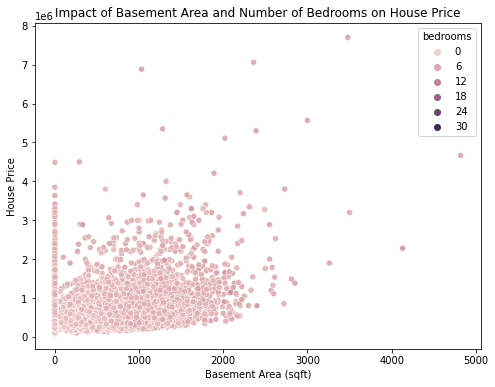

In [5]:

# Filter out houses with missing basement area
dt_filtered = dt[dt["sqft_basement"] != "?"]

# Convert sqft_basement column to numeric
dt_filtered["sqft_basement"] = pd.to_numeric(dt_filtered["sqft_basement"])

# Plot the relationship between basement area, number of bedrooms, and house price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt_filtered, x="sqft_basement", y="price", hue="bedrooms")
plt.xlabel("Basement Area (sqft)")
plt.ylabel("House Price")
plt.title("Impact of Basement Area and Number of Bedrooms on House Price")
plt.show()


## Research Question 5: Can we predict the presence of a waterfront property (waterfront column) based on other features using logistic regression?

In [6]:


# Load the dataset into a DataFrame
dt = pd.read_csv("kc_house_data.csv")

# Convert the date column to numeric
dt["date"] = pd.to_numeric(dt["date"].str.replace("T000000", ""))

# Select the features and target variable
X = dt.drop("waterfront", axis=1)
y = dt["waterfront"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the presence of waterfront on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.9909784871616932
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4284
           1       0.50      0.13      0.20        39

    accuracy                           0.99      4323
   macro avg       0.75      0.56      0.60      4323
weighted avg       0.99      0.99      0.99      4323



## Research Question 6: How does the grade (house construction quality) and condition of the house impact the house price?

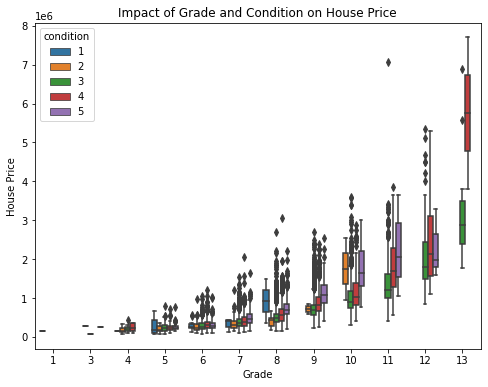

In [7]:


# Plot the relationship between grade, condition, and house price
plt.figure(figsize=(8, 6))
sns.boxplot(data=dt, x="grade", y="price", hue="condition", width=0.7)
plt.xlabel("Grade")
plt.ylabel("House Price")
plt.title("Impact of Grade and Condition on House Price")
plt.show()


## Research Question 7: Is there a correlation between the house price and the year the house was built or renovated?

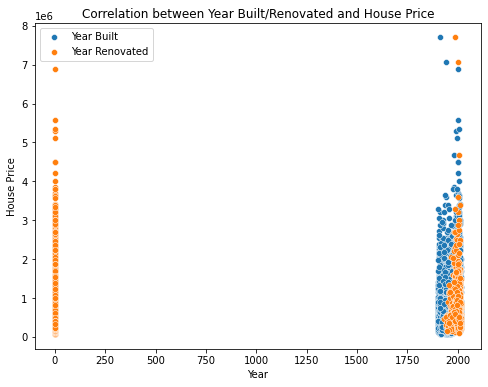

In [8]:

# Plot the correlation between house price and year built/renovated
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x="yr_built", y="price", label="Year Built")
sns.scatterplot(data=dt, x="yr_renovated", y="price", label="Year Renovated")
plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("Correlation between Year Built/Renovated and House Price")
plt.legend()
plt.show()


## Research Question 8: How does the number of bedrooms and bathrooms together influence the house price compared to each feature individually?

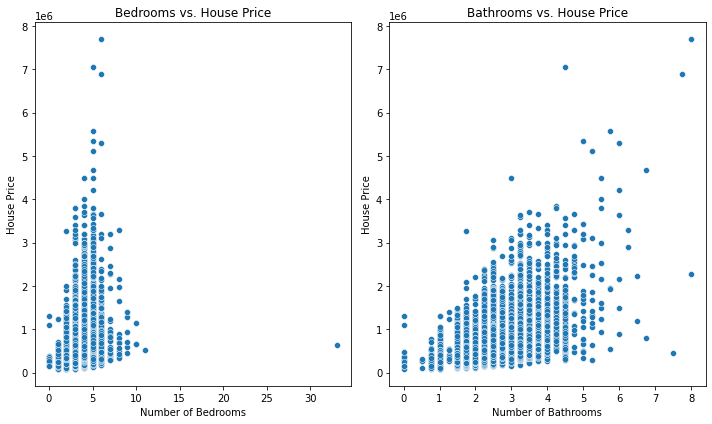

Coefficients: [ 20138.26578118 237780.5850233 ]
Intercept: -30642.995948886964


In [9]:

# Select the features and target variable
X = dt[["bedrooms", "bathrooms"]]
y = dt["price"]

# Plot the relationship between bedrooms, bathrooms, and house price
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=dt, x="bedrooms", y="price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.title("Bedrooms vs. House Price")
plt.subplot(1, 2, 2)
sns.scatterplot(data=dt, x="bathrooms", y="price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("House Price")
plt.title("Bathrooms vs. House Price")
plt.tight_layout()
plt.show()

# Perform multiple linear regression
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


## Research Question 9: How does the location (latitude and longitude) of a house affect its price?

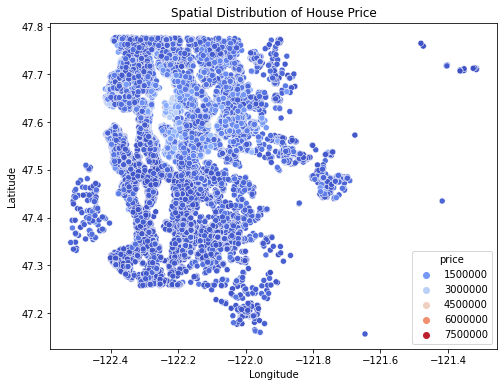

In [10]:

# Plot the relationship between latitude, longitude, and house price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dt, x="long", y="lat", hue="price", palette="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of House Price")
plt.show()


## Research Question 10: Can we predict the house price based on other features using multiple linear regression?

In [11]:


# Select the features and target variable
X = dt.drop(["id", "date", "price"], axis=1)
y = dt["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 45173046132.79194
R-squared Score: 0.7011904448878294
